In [2]:
!pypinfo --auth key.json
# these are the modules you want to analyze
names=['torch', 'tensorflow']


Credentials location set to "key.json".


In [7]:
# if you want one-off data by package and OS
for name in names:
    !pypinfo $name system distro


Served from cache: False
Data processed: 1.24 GiB
Data billed: 1.24 GiB
Estimated cost: $0.01

| system_name | distro_name              | download_count |
| ----------- | ------------------------ | -------------- |
| Linux       | Debian GNU/Linux         |      2,764,363 |
| Linux       | Ubuntu                   |      2,482,248 |
| Windows     | None                     |        328,680 |
| Linux       | Alpine Linux             |        272,310 |
| Linux       | Amazon Linux AMI         |        225,008 |
| Linux       | CentOS Linux             |        207,672 |
| Darwin      | macOS                    |        109,968 |
| Linux       | Amazon Linux             |         86,403 |
| Linux       | None                     |         51,767 |
| Linux       | Red Hat Enterprise Linux |         23,968 |
| Total       |                          |      6,552,387 |

Served from cache: False
Data processed: 1.24 GiB
Data billed: 1.24 GiB
Estimated cost: $0.01

| system_name | distro_name  

In [3]:
# this will grab data for each month starting from 2016-1 to current date; you can add -f <date> and/or -t <date> to specific a date range
# make sure that you create /data and /image dirs in the root; json files and pngs will be dropped in there respectively.
for name in names:
    !python pypi-trends.py -p $name
    !python json2csv.py --chart -p $name

json
  data/torch-2017-07.json
2017-06-01 2017-06-30
pypinfo --start-date 2017-06-01 --end-date 2017-06-30 --percent --limit 100 --json torch pyversion > data/torch-2017-06.json
  data/torch-2017-06.json
2017-05-01 2017-05-31
pypinfo --start-date 2017-05-01 --end-date 2017-05-31 --percent --limit 100 --json torch pyversion > data/torch-2017-05.json
  data/torch-2017-05.json
2017-04-01 2017-04-30
pypinfo --start-date 2017-04-01 --end-date 2017-04-30 --percent --limit 100 --json torch pyversion > data/torch-2017-04.json
  data/torch-2017-04.json
2017-03-01 2017-03-31
pypinfo --start-date 2017-03-01 --end-date 2017-03-31 --percent --limit 100 --json torch pyversion > data/torch-2017-03.json
  data/torch-2017-03.json
2017-02-01 2017-02-28
pypinfo --start-date 2017-02-01 --end-date 2017-02-28 --percent --limit 100 --json torch pyversion > data/torch-2017-02.json
  data/torch-2017-02.json
2017-01-01 2017-01-31
pypinfo --start-date 2017-01-01 --end-date 2017-01-31 --percent --limit 100 --json

In [6]:
# This is to generate the plot over time for each module (x-axis is date, y-axis is download count)
# Here's where we'll create the dict to feed into the chart
import os
import json
import matplotlib as plt
import numpy as np

dir = r'data'
# create dict with data to plot 
packages_over_time = {}

#iterate over each file in the data directory
for filename in os.listdir(dir):
    if filename.endswith('.json') and filename.replace('.', '-').split('-')[0] in names:
        #load data 
        with open(os.path.join(dir,filename)) as f:
            data = json.load(f)
            count = 0
            for row in data['rows']:
                count += row['download_count']
                temp = filename.replace('.', '-').split('-')
                date = temp[1] + '-' + temp[2]
                package_name = temp[0]
                if package_name not in packages_over_time:
                    packages_over_time[package_name] = {};
                
                package = packages_over_time[package_name]
                package[date] = count


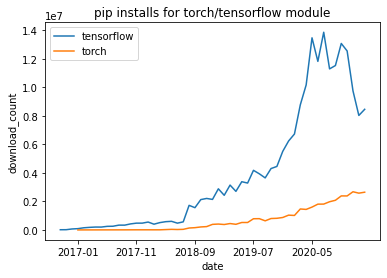

In [7]:
# Here's where we'll actually create the graph
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 9, 40)

# for each package in m
for p in packages_over_time:
    # ignore modules we don't want on the same chart
    if p not in names:
        break
    x_axis = []
    y_axis = []
    
    package_data = packages_over_time[p]
    for date in package_data:
        x_axis.append(date)
        y_axis.append(package_data[date])
    
    plt.plot(x_axis, y_axis, label=p)

#clean up x-axis ticks
ax = plt.gca()
ax.set(xticks=x_axis[::10], xticklabels=x_axis[::10])

#configure the chart area with axes and a title
plt.xlabel('date')
plt.ylabel('download_count')
plt.title(f"pip installs for {'/'.join(names)} module")
plt.legend()
plt.savefig(f"images/{'-'.join(names)}-over-time.png")
